In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [2]:
dt1 = pd.read_csv("/content/MOCK_DATA.csv")
dt2 = pd.read_csv("/content/MOCK_DATA (1).csv")
dt3 = pd.read_csv("/content/MOCK_DATA (2).csv")
dt4 = pd.read_csv("/content/MOCK_DATA (3).csv")
dt5 = pd.read_csv("/content/MOCK_DATA (4).csv")
dt6 = pd.read_csv("/content/MOCK_DATA (5).csv")
dt7 = pd.read_csv("/content/MOCK_DATA (6).csv")
dt8 = pd.read_csv("/content/MOCK_DATA (7).csv")
dt8 = pd.read_csv("/content/MOCK_DATA (8).csv")
dt9 = pd.read_csv("/content/MOCK_DATA (9).csv")


In [6]:
dataset = pd.read_csv("/content/DadosTCC_V0.csv")

In [8]:
dataset['Locais'].value_counts()

København                  1943
Lae                        1102
San Isidro                 1049
Benito Juarez              1034
Stockholm                  1007
Oslo                        999
Saint-Louis du Sud          718
Tanjung Palas               483
Albania                     423
Tarrafal de São Nicolau     242
Name: Locais, dtype: int64

In [11]:
dataset = dataset.drop(columns="Unnamed: 0")

In [12]:
dataset.head()

,Gênero musical favorito,Deseja gastar,Até quanto pretende gastar?,O quão longe gostaria de ir?,Gostaria de comer durante o passeio?,Qual o seu estado civil?,É religioso?,Tem filhos?,Gosta de esportes?,Quais esportes?,Torce para algum time?,Estilo de filme favorito:,Ponto de partida,Locais
0,5,False,54,55,True,3,True,True,False,2,3,7,54,Oslo
1,6,True,35,53,False,3,True,True,False,5,1,6,58,Oslo
2,7,True,100,61,True,4,True,True,True,2,3,5,66,Oslo
3,2,False,54,61,True,1,True,False,True,3,3,2,58,Oslo
4,2,False,84,94,False,3,False,False,True,5,3,5,12,Oslo


In [18]:
#frequency = pd.DataFrame(dataset['Locais'].value_counts())
#frequency.reset_index(inplace=True)
#frequency.columns = ['Locais', 'Frequencia']
#frequency = frequency.query("Frequencia > 0")
#dataset = dataset[dataset['Locais'].isin(frequency['Locais'])]

In [20]:
y = dataset['Locais']
x = dataset.drop(columns=['Locais', 'Até quanto pretende gastar?', 'Ponto de partida', 'O quão longe gostaria de ir?'])

In [21]:
y.value_counts()

København                  1943
Lae                        1102
San Isidro                 1049
Benito Juarez              1034
Stockholm                  1007
Oslo                        999
Saint-Louis du Sud          718
Tanjung Palas               483
Albania                     423
Tarrafal de São Nicolau     242
Name: Locais, dtype: int64

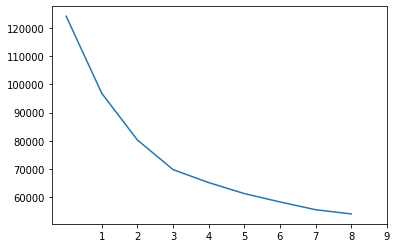

In [22]:
#Verificar o número idel de clusters
def KMeansOtimization(num_clusters, classe):
  kmeans = KMeans(n_clusters = num_clusters)
  kmeans.fit(classe)
  return [num_clusters, kmeans.inertia_]

result = [KMeansOtimization(clusters,x) for clusters in range(1, 10)]
result = pd.DataFrame(result,columns=['Cluster', 'Erro'])
result['Erro'].plot(xticks =result['Cluster'])

In [23]:
kmeans = KMeans(n_clusters = 3)

In [24]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.cluster_centers_

array([[6.04749716, 0.51365188, 0.48321957, 2.52929465, 0.50625711,
        0.50455063, 0.49857793, 3.01848692, 2.50284414, 4.11234357],
       [2.53346856, 0.50169033, 0.48275862, 2.50439486, 0.50270453,
        0.48039216, 0.50338066, 3.01960784, 2.50033807, 5.68458418],
       [2.82779097, 0.49564529, 0.50633413, 2.51187648, 0.50673001,
        0.49960412, 0.5       , 2.96951702, 2.46437055, 1.92478226]])

In [26]:
groups = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns )
groups = groups.transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43a4ac23d0>,
      dtype=object)

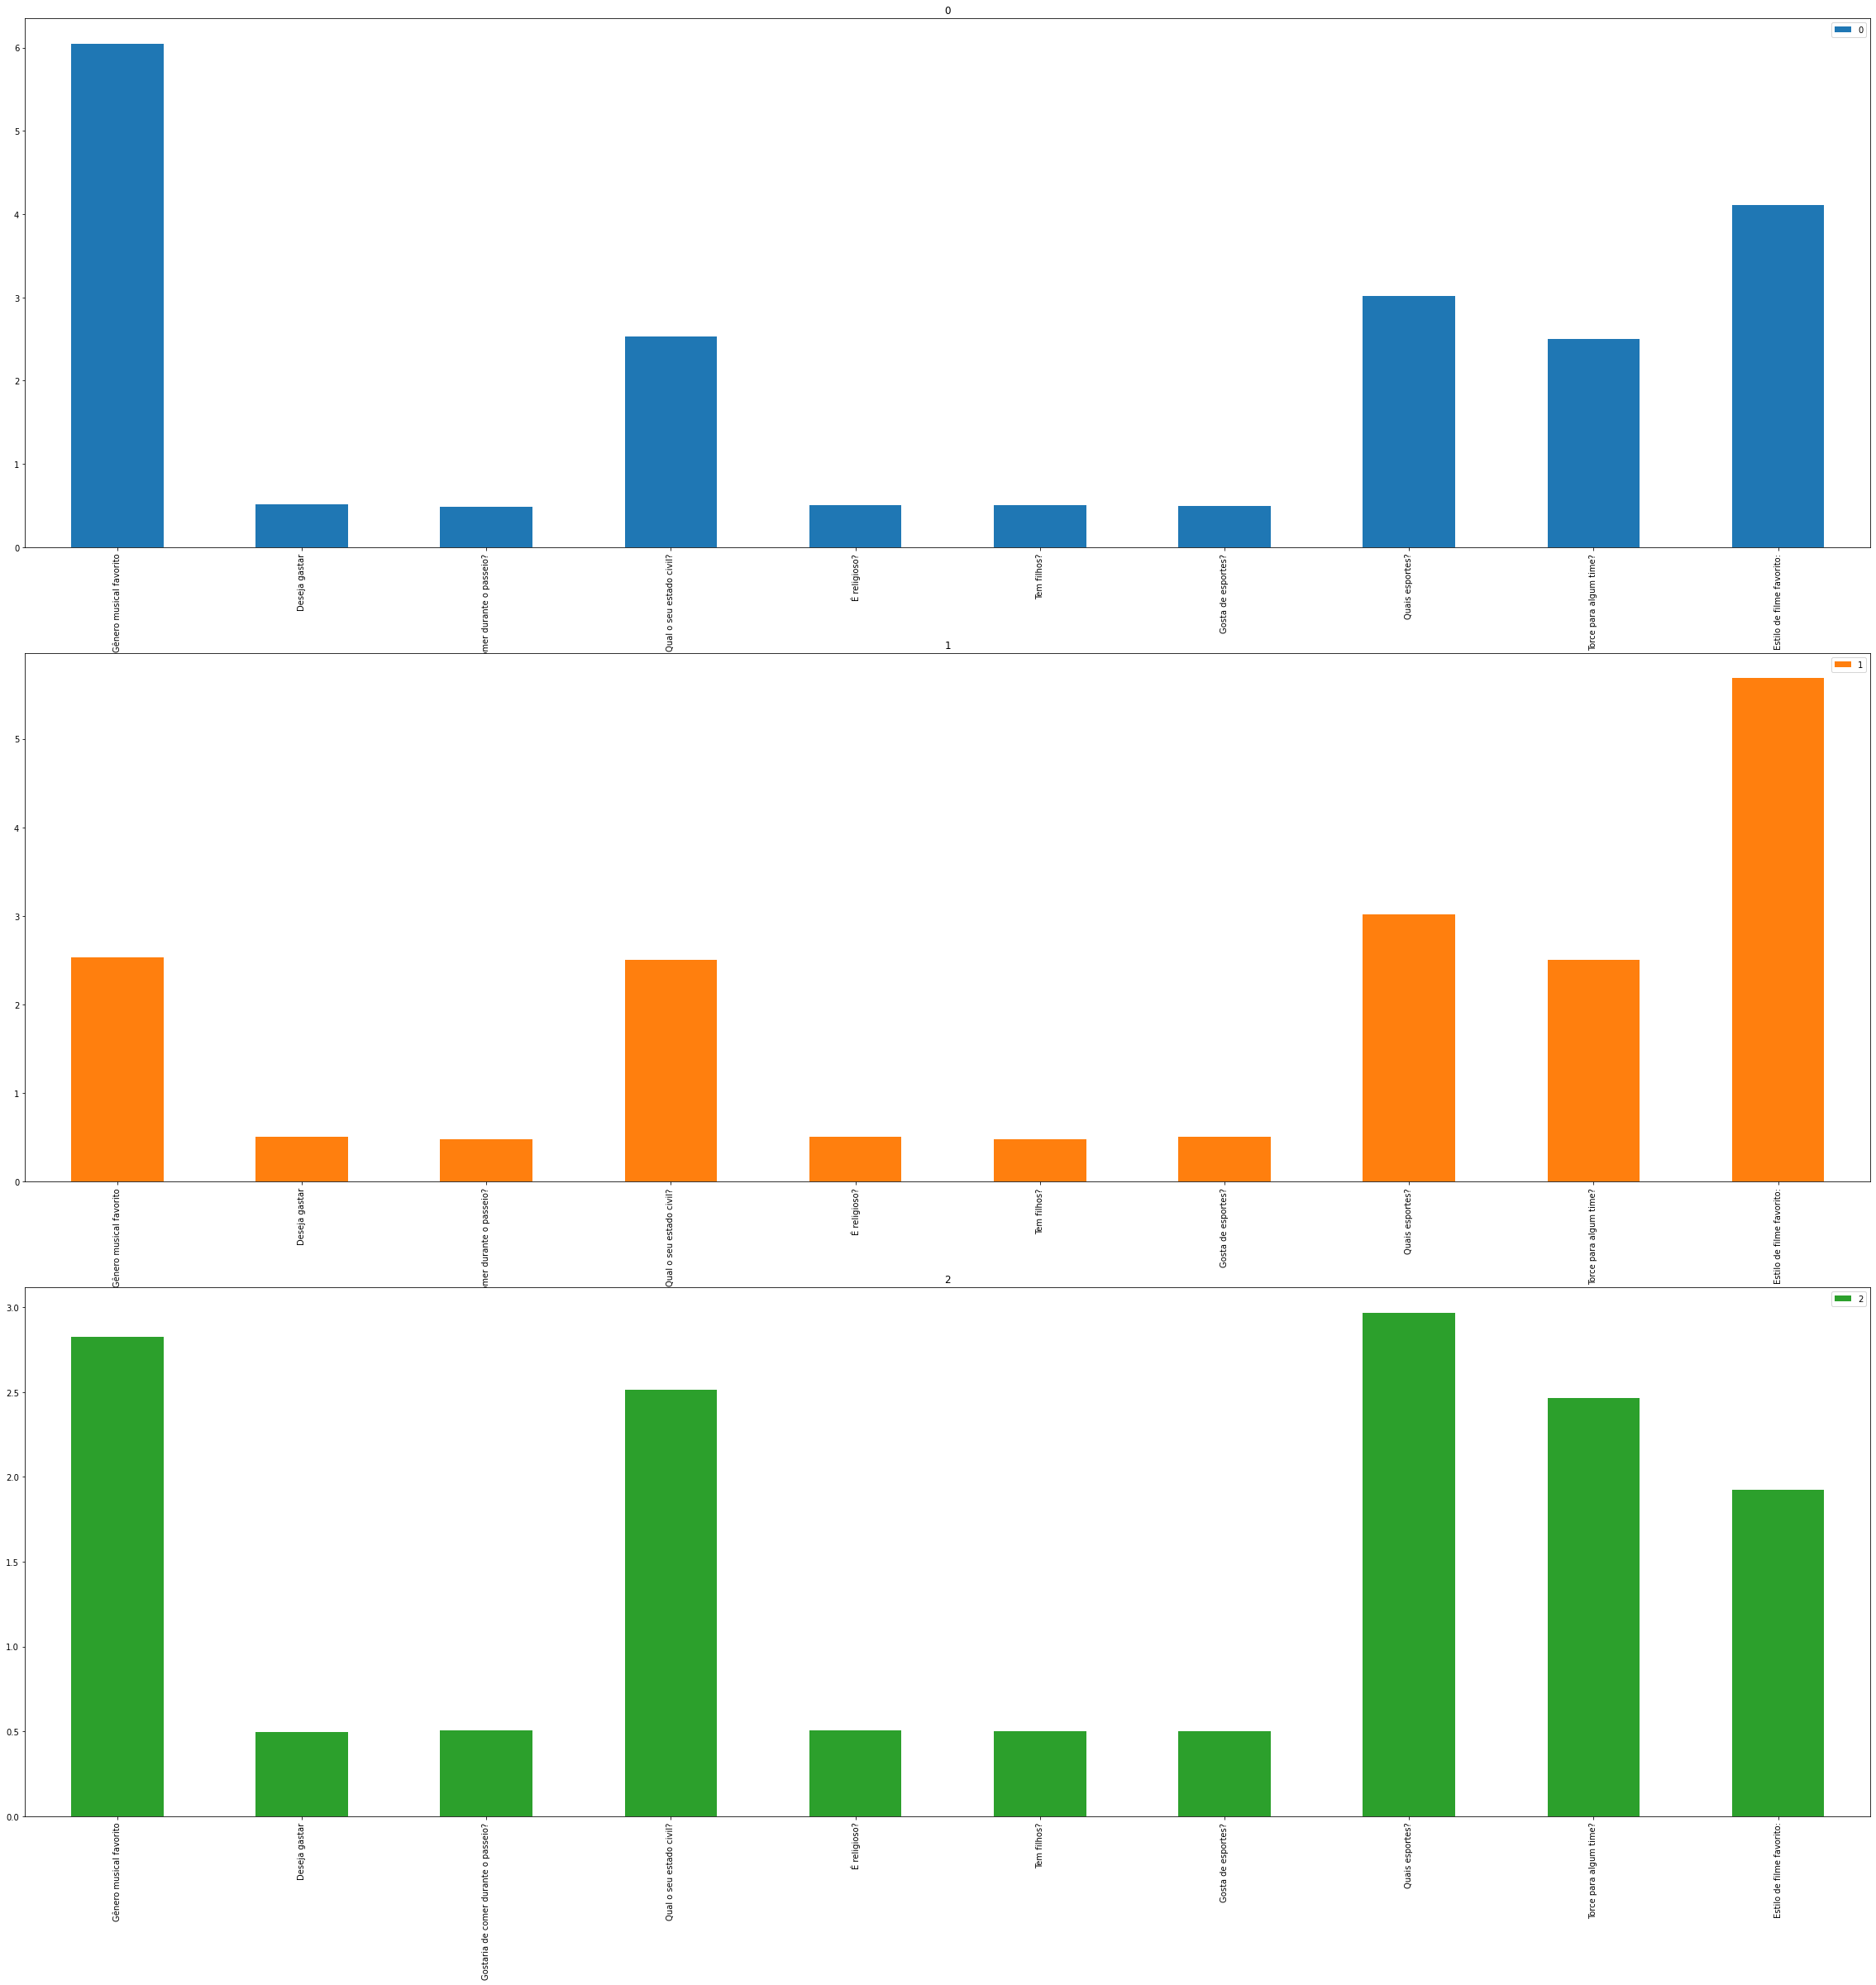

In [27]:
groups.plot.bar(subplots = True, figsize = (40, 40), sharex =False)

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE()

In [30]:
visualizacao = tsne.fit_transform(x)

In [31]:
import seaborn as sns

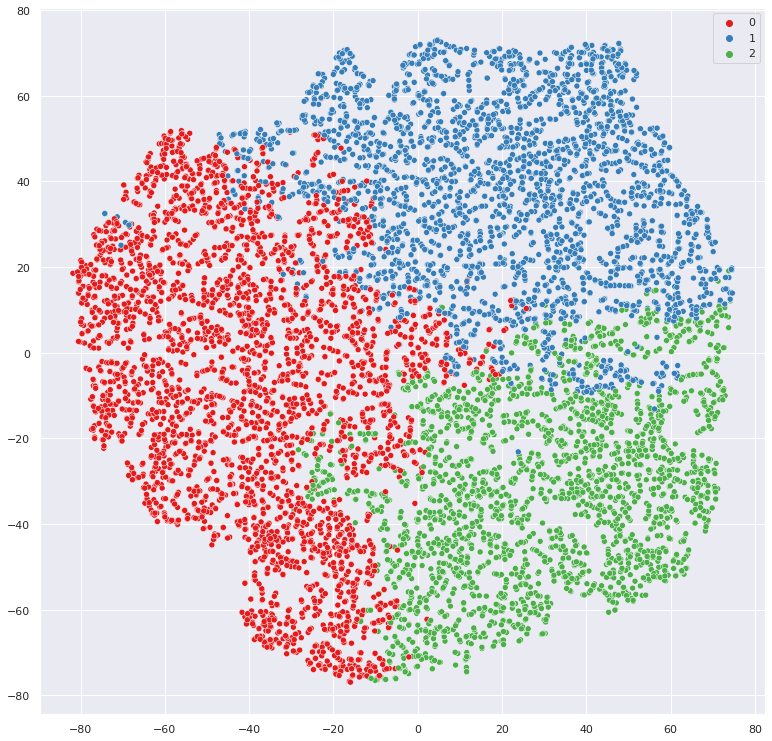

In [32]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue =kmeans.labels_, palette=sns.color_palette('Set1', 3) )

In [33]:
x['Cluster'] =kmeans.labels_

In [34]:
corr = x.corr()
corr

,Gênero musical favorito,Deseja gastar,Gostaria de comer durante o passeio?,Qual o seu estado civil?,É religioso?,Tem filhos?,Gosta de esportes?,Quais esportes?,Torce para algum time?,Estilo de filme favorito:,Cluster
Gênero musical favorito,1.000000,0.013658,-0.004762,0.006212,0.009903,0.014660,-0.001432,0.000252,0.014995,-0.007798,-0.692839
Deseja gastar,0.013658,1.000000,0.002418,-0.003942,0.012570,-0.004133,-0.000677,-0.007350,-0.011318,-0.006638,-0.014884
Gostaria de comer durante o passeio?,-0.004762,0.002418,1.000000,-0.011514,-0.008006,-0.018204,0.011804,-0.011758,-0.016708,-0.002403,0.017701
Qual o seu estado civil?,0.006212,-0.003942,-0.011514,1.000000,0.021980,0.003645,-0.001118,0.015380,0.004980,-0.006281,-0.007023
É religioso?,0.009903,0.012570,-0.008006,0.021980,1.000000,0.001433,-0.008901,-0.019029,0.009789,-0.007760,0.000047
Tem filhos?,0.014660,-0.004133,-0.018204,0.003645,0.001433,1.000000,0.017345,-0.002301,0.001114,-0.013286,-0.005948
Gosta de esportes?,-0.001432,-0.000677,0.011804,-0.001118,-0.008901,0.017345,1.000000,0.001553,0.019819,0.007338,0.001519
Quais esportes?,0.000252,-0.007350,-0.011758,0.015380,-0.019029,-0.002301,0.001553,1.000000,-0.026823,0.013618,-0.013127
Torce para algum time?,0.014995,-0.011318,-0.016708,0.004980,0.009789,0.001114,0.019819,-0.026823,1.000000,0.015241,-0.013259
Estilo de filme favorito:,-0.007798,-0.006638,-0.002403,-0.006281,-0.007760,-0.013286,0.007338,0.013618,0.015241,1.000000,-0.385379


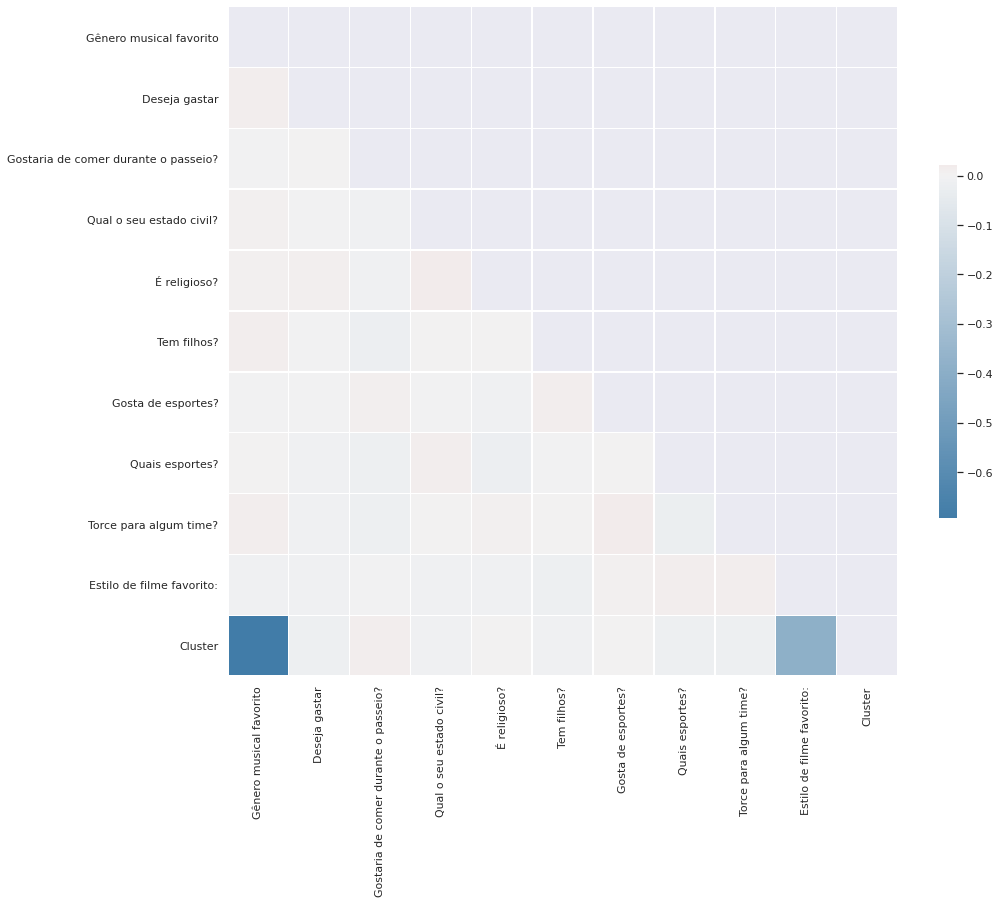

In [35]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = .25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes_SVC = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 6750 elementos e testaremos com 2250 elementos
A acurácia foi 12.67%


In [37]:
x

,Gênero musical favorito,Deseja gastar,Gostaria de comer durante o passeio?,Qual o seu estado civil?,É religioso?,Tem filhos?,Gosta de esportes?,Quais esportes?,Torce para algum time?,Estilo de filme favorito:,Cluster
0,5,False,True,3,True,True,False,2,3,7,1
1,6,True,False,3,True,True,False,5,1,6,0
2,7,True,True,4,True,True,True,2,3,5,0
3,2,False,True,1,True,False,True,3,3,2,2
4,2,False,False,3,False,False,True,5,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...
8995,6,False,True,3,False,False,False,1,1,7,0
8996,4,False,False,3,False,False,False,5,2,6,1
8997,2,True,False,3,False,False,False,1,4,4,1
8998,7,True,False,1,True,True,True,5,3,7,0
